# LDA

### Task 1

In [11]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
#This is a helper code for problem-1 (Task-1) of PA-4
#Complete this code by writing the function definations
#Compute following terms and print them:\\
#1. Difference of class wise means = ${m_1-m_2}$\\
#2. Total Within-class Scatter Matrix $S_W$\\
#3. Between-class Scatter Matrix $S_B$\\
#4. The EigenVectors of matrix $S_W^{-1}S_B$ corresponding to highest EigenValue\\
#5. For any input 2-D point, print its projection according to LDA.



def ComputeMeanDiff(X,df):

  mean_0_feature1=df.loc[df['class'] == 0.0, 'f1'].mean()
  mean_0_feature2=df.loc[df['class']== 0.0, 'f2'].mean()
  mean_1_feature1= df.loc[df['class']== 1.0, 'f1'].mean()
  mean_1_feature2= df.loc[df['class']== 1.0, 'f2'].mean()
  m_1=[mean_0_feature1, mean_0_feature2]
  m_2=[mean_1_feature1, mean_1_feature2]
  mean_diff = np.array(m_1) - np.array(m_2)
  return mean_diff, m_1, m_2


#########################################################
###################Helper Code###########################
#########################################################


def ComputeSW(X,df):
    S1= np.zeros((2,2))
    S2= np.zeros((2,2))
    S_W = np.zeros((2,2))
    m_1 = df[df['class'] == 0.0][['f1', 'f2']].mean().values.reshape(2,1)
    m_2 = df[df['class'] == 1.0][['f1', 'f2']].mean().values.reshape(2,1)
    for _, row in df[df['class'] == 0.0].iterrows():
        row_vec = row[['f1', 'f2']].values.reshape(2,1) #row_vec is a 2D vector like m_1. (f1,f2) sample given it is in class 1
        S1 += (row_vec - m_1).dot((row_vec - m_1).T)
    for _, row in df[df['class'] == 1.0].iterrows():
        row_vec = row[['f1', 'f2']].values.reshape(2,1)
        S2 += (row_vec - m_2).dot((row_vec - m_2).T)
    S_W= S1+ S2
    return S_W

def ComputeSB(X,df):
    S_B = np.zeros((2,2))
    m_1 = df[df['class'] == 0.0][['f1', 'f2']].mean().values.reshape(2,1)
    m_2 = df[df['class'] == 1.0][['f1', 'f2']].mean().values.reshape(2,1)
    # diff, m1x, m2x= ComputeMeanDiff(X,df)
    # m1= np.array(m1x)
    # m2= np.array(m2x)
    # print(m1)
    # m1.reshape(2,1)
    # m2.reshape(2,1)
    md= m_1-m_2
    # print(md.T)
    S_B= np.dot(md, md.T)
    return S_B
def GetLDAProjectionVector(X,df):
    S_B= ComputeSB(X,df)
    S_W= ComputeSW(X,df)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True) #to sort according to decreasing order
    print('Eigenvalues in decreasing order: ')
    for i in eig_pairs:
        print(i[0])
    for i in range(len(eig_vals)):
        eigvec_sc = eig_vecs[:,i].reshape(2,1)
        print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
        print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
        findex= eig_vals.argmax() #selecting largest eigenvalue will give maximum separation and minimum within class scatter
        w = eig_vecs[:, findex] #represents the direction in the feature space that maximizes the class separation when you project your data onto it
    return w
def project(x,y,w):
  p= np.array([x,y])
  projectionmag= np.dot(p,w)
  projdir= np.dot(p,w)* w
  return projectionmag, projdir




In [13]:
df = pd.read_csv('https://github.com/anandmishra22/PRML-Spring-2023/blob/main/programmingAssignment/PA-4/data.csv?raw=true', names= ['f1', 'f2', 'class'])
X = np.empty((0, 3))
for sample in df:
  print (sample)
X= df.to_numpy()
print(X)
print(df)

f1
f2
class
[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]
            f1        f2  class
0     1.861898  2.722963    0.0
1     2.235896 -2.157721    0.0
2     1.692817  0.995896    0.0
3     2.584343  3.722926    0.0
4     1.689087 -0.838214    0.0
...        ...       ...    ...
1995  6.234800  5.117729    1.0
1996  6.803708  3.127105    1.0
1997  4.466789  3.444926    1.0
1998  5.658980  4.043341    1.0
1999  1.980180  7.158152    1.0

[2000 rows x 3 columns]


In [14]:
meandiff, m1,m2=ComputeMeanDiff(X,df)
print(f"Mean of samples with class 0.0:  {m1}, Mean of samples with class 1.0: {m2}, Difference in class means: {meandiff}")

Mean of samples with class 0.0:  [2.049236220970497, 2.0276954531455904], Mean of samples with class 1.0: [5.034786691276668, 5.051953981970655], Difference in class means: [-2.98555047 -3.02425853]


In [15]:
Sw=ComputeSW(X,df)
print(Sw)

[[4421.02288527 -237.41918148]
 [-237.41918148 4556.36685753]]


In [16]:
Sb= ComputeSB(X,df)
print(Sb)

[[8.91351161 9.02907647]
 [9.02907647 9.14613965]]


In [31]:
w= GetLDAProjectionVector(X,df)
w_normalized = w / np.linalg.norm(w)
print(w)
print(w_normalized)

Eigenvalues in decreasing order: 
0.004248221663209285
0.0

Eigenvector 1: 
[[0.71310953]
 [0.70105263]]
Eigenvalue 1: 4.25e-03

Eigenvector 2: 
[[-0.71164636]
 [ 0.70253787]]
Eigenvalue 2: 0.00e+00
[0.71310953 0.70105263]
[0.71310953 0.70105263]


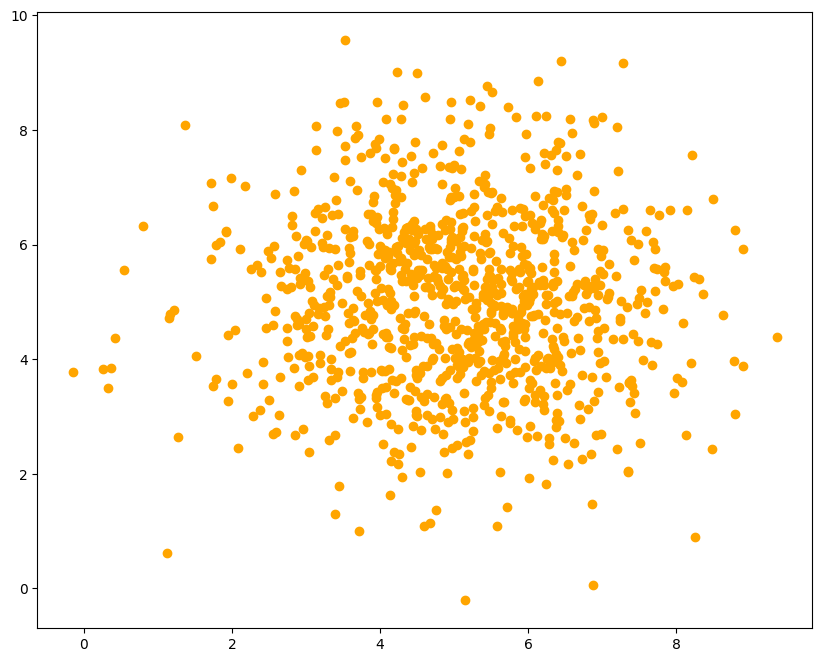

In [23]:
plt.figure(figsize=(10, 8))
classes=1.0
subset = df[df['class'] == classes]
plt.scatter(subset['f1'], subset['f2'], label=f'Class {int(classes)}', color="orange")

Eigenvalues in decreasing order: 
0.004248221663209285
0.0

Eigenvector 1: 
[[0.71310953]
 [0.70105263]]
Eigenvalue 1: 4.25e-03

Eigenvector 2: 
[[-0.71164636]
 [ 0.70253787]]
Eigenvalue 2: 0.00e+00
LDA Projection Vector:  [0.71310953 0.70105263]


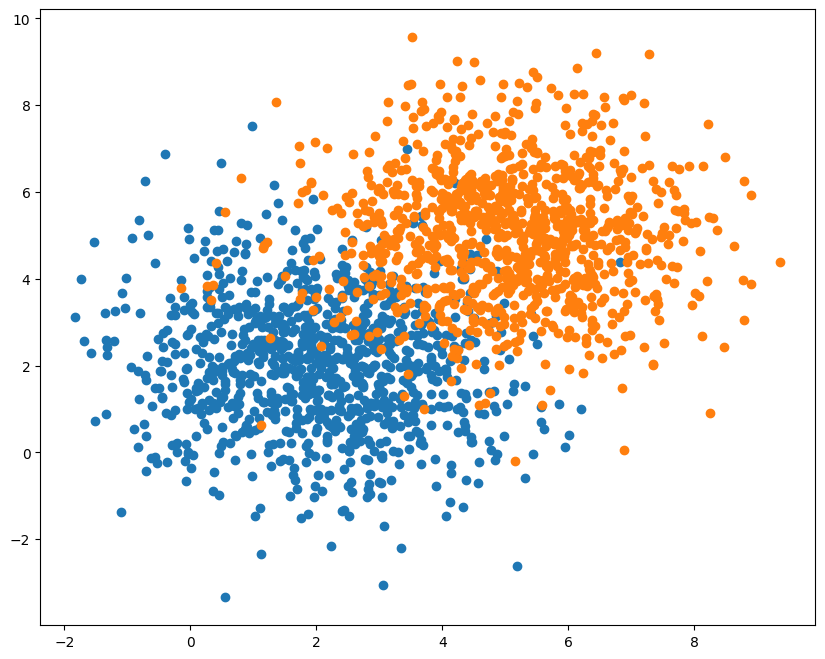

In [19]:
w = GetLDAProjectionVector(X, df)
print("LDA Projection Vector: ", w)

plt.figure(figsize=(10, 8))
for classes in [0.0, 1.0]:
    subset = df[df['class'] == classes]
    plt.scatter(subset['f1'], subset['f2'], label=f'Class {int(classes)}')

### Task-2 (5 pts):
Show the LDA projection vector on a plot.


[4.58552696 4.50799715]


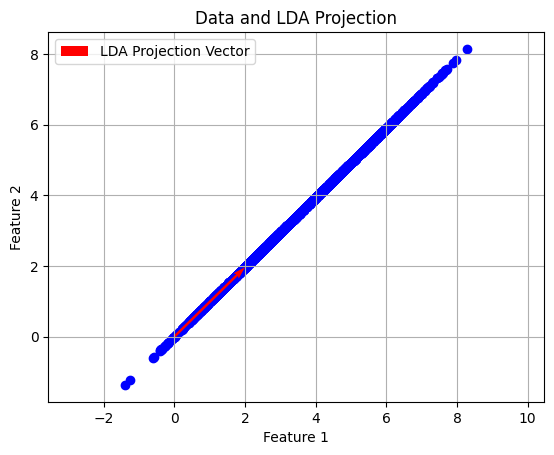

In [32]:
for _, row in df.iterrows():
    x, y = row['f1'], row['f2']
    _, projection = project(x, y, w)

    plt.scatter(projection[0], projection[1], color='blue',  marker='o')
print(projection)
# Add LDA projection vector line
plt.quiver(0, 0, w[0], w[1], scale=5, color='red', width=0.005, label='LDA Projection Vector')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Data and LDA Projection')
plt.grid(True)
plt.axis('equal')
plt.show()

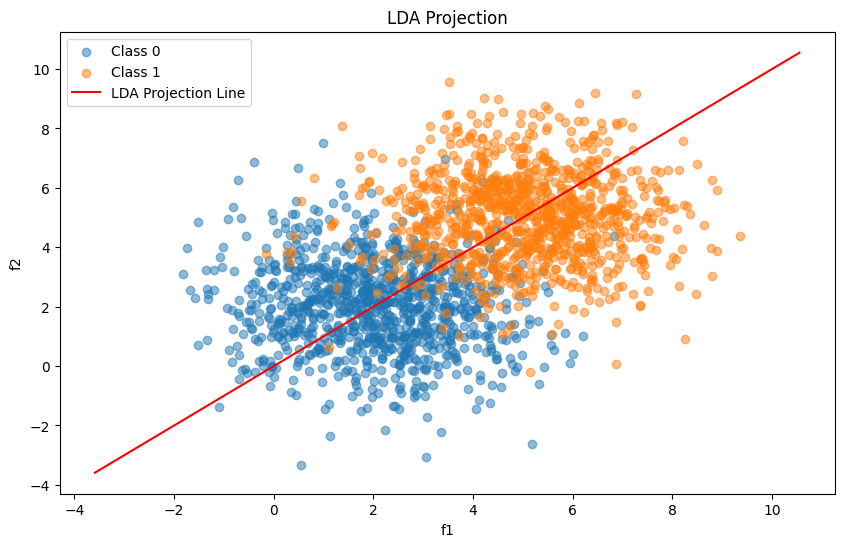

In [34]:
def plot_lda_projection_line(df, w):
  #plotting lda line along with all sample points
    plt.figure(figsize=(10, 6))

    plt.scatter(df[df['class']==0.0]['f1'], df[df['class']== 0.0]['f2'], label='Class 0', alpha=0.5)
    plt.scatter(df[df['class']==1.0]['f1'], df[df['class']== 1.0]['f2'], label='Class 1', alpha=0.5)
    mean_overall = df[['f1', 'f2']].mean().values

    #UThis line will pass through mean_overall
    #Calculating two points along the line based on w and mean_overall
    line_length = 10
    p1= mean_overall+ w[1]*line_length
    p2= mean_overall- w[0]*line_length

    # Plot the LDA line
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', label='LDA Projection Line')

    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.legend()
    plt.title('LDA Projection')
    plt.show()

plot_lda_projection_line(df,w)

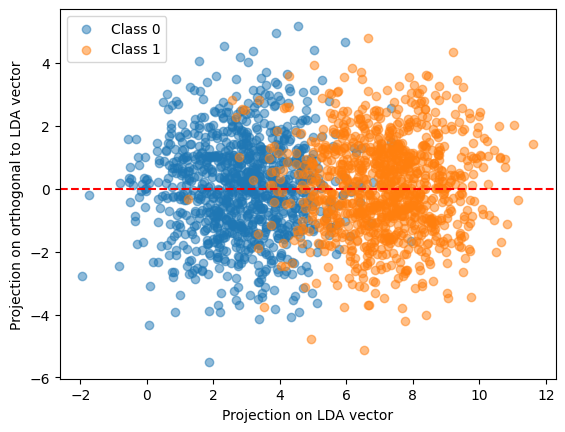

In [35]:
import numpy as np
import matplotlib.pyplot as plt
#I wish to plot the rotated data with the lda line as one axis and its orthogonal partner as the other.

#Compute an orthogonal vector to w for the second axis
w_orth=np.array([-w[1], w[0]])

# Project all data points onto w and w_orth
# Each row in df corresponds to a point, assuming 'f1' and 'f2' are your original features
points= df[['f1', 'f2']].values
proj_on_w= np.dot(points, w)
proj_on_w_orth= np.dot(points, w_orth)

# Plot the rotated data
plt.scatter(proj_on_w[df['class']== 0], proj_on_w_orth[df['class']== 0], alpha=0.5, label='Class 0')
plt.scatter(proj_on_w[df['class']== 1], proj_on_w_orth[df['class']== 1], alpha=0.5, label='Class 1')

# Add LDA line - it's now the x-axis, so we draw a line along y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Projection on LDA vector')
plt.ylabel('Projection on orthogonal to LDA vector')
plt.legend()
plt.show()

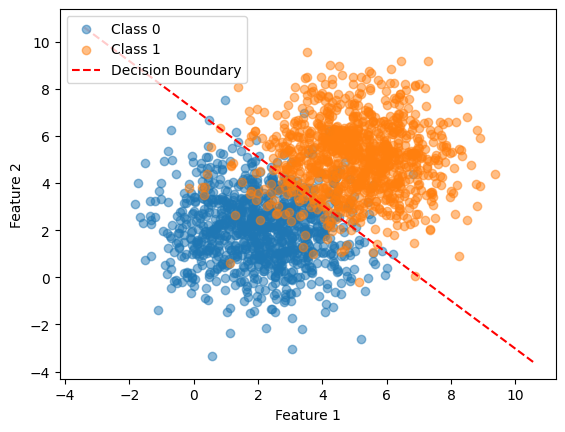

In [36]:

#trying to plot the decision boundary now (which best separates the two classes)
m1= df[df['class']== 0.0][['f1', 'f2']].mean().values
m2= df[df['class']== 1.0][['f1', 'f2']].mean().values
m=(m1+m2)/2

#Decision boundary is perpendicular to w, so we rotate w by 90 degrees
db_vector=np.array([-w[1], w[0]])

# Points along the decision boundary line for plotting
db_point1=m- db_vector * 10  #Arbitrarily extend the line by scaling the db_vector
db_point2=m+ db_vector * 10

#orig data
plt.scatter(df[df['class'] == 0.0]['f1'], df[df['class'] == 0.0]['f2'], alpha=0.5, label='Class 0')
plt.scatter(df[df['class'] == 1.0]['f1'], df[df['class'] == 1.0]['f2'], alpha=0.5, label='Class 1')

#decision line!
plt.plot([db_point1[0], db_point2[0]], [db_point1[1], db_point2[1]], 'r--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Task-3 (10 pts):
Compare the performance of 1-NN neighbor classifier on
original data vs projected data. Write down your observations.

In [50]:
proj= np.dot(df[['f1', 'f2']].values, w.reshape(-1, 1))
labels = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(df[['f1', 'f2']], labels, test_size=0.2, random_state=1000) #random states 42 and 1000 taken

X_train_proj, X_test_proj = train_test_split(proj, test_size=0.2, random_state=1000)
#1-NN on original data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
predictions_original = knn1.predict(X_test)
accuracy_original = accuracy_score(y_test, predictions_original)
#1-NN on projected data
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train_proj, y_train)
predictions_projected = knn2.predict(X_test_proj.reshape(-1, 1))
accuracy_projected = accuracy_score(y_test, predictions_projected)

print(f"Accuracy on Original Data: {accuracy_original}")
print(f"Accuracy on Projected Data using lda: {accuracy_projected}")

Accuracy on Original Data: 0.8975
Accuracy on Projected Data using lda: 0.8875


# Naive Bayes

## Task-0 (0 pt):
Split the dataset into train-test so that randomly chosen 12
out of 14 samples go to train split and the remaining two samples go to test
split.

In [3]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nb = pd.read_csv('https://github.com/anandmishra22/PRML-Spring-2023/blob/main/programmingAssignment/PA-4/naive_bayes.csv?raw=true')
nb

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [ ]:
print("Percentage of missing values:")
print(((nb.isna().sum())/nb.shape[0])*100)

Percentage of missing values:
Outlook     0.0
Temp        0.0
Humidity    0.0
Windy       0.0
Play        0.0
dtype: float64


<ipython-input-8-27e43901e97e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=nb, x="Play", y="Outlook", palette="bwr")
<ipython-input-8-27e43901e97e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=nb, x="Play", y="Temp", palette="bwr")
<ipython-input-8-27e43901e97e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=nb, x="Play", y="Humidity", palette="bwr")
<ipython-input-8-27e43901e97e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

<Axes: xlabel='Play', ylabel='Windy'>

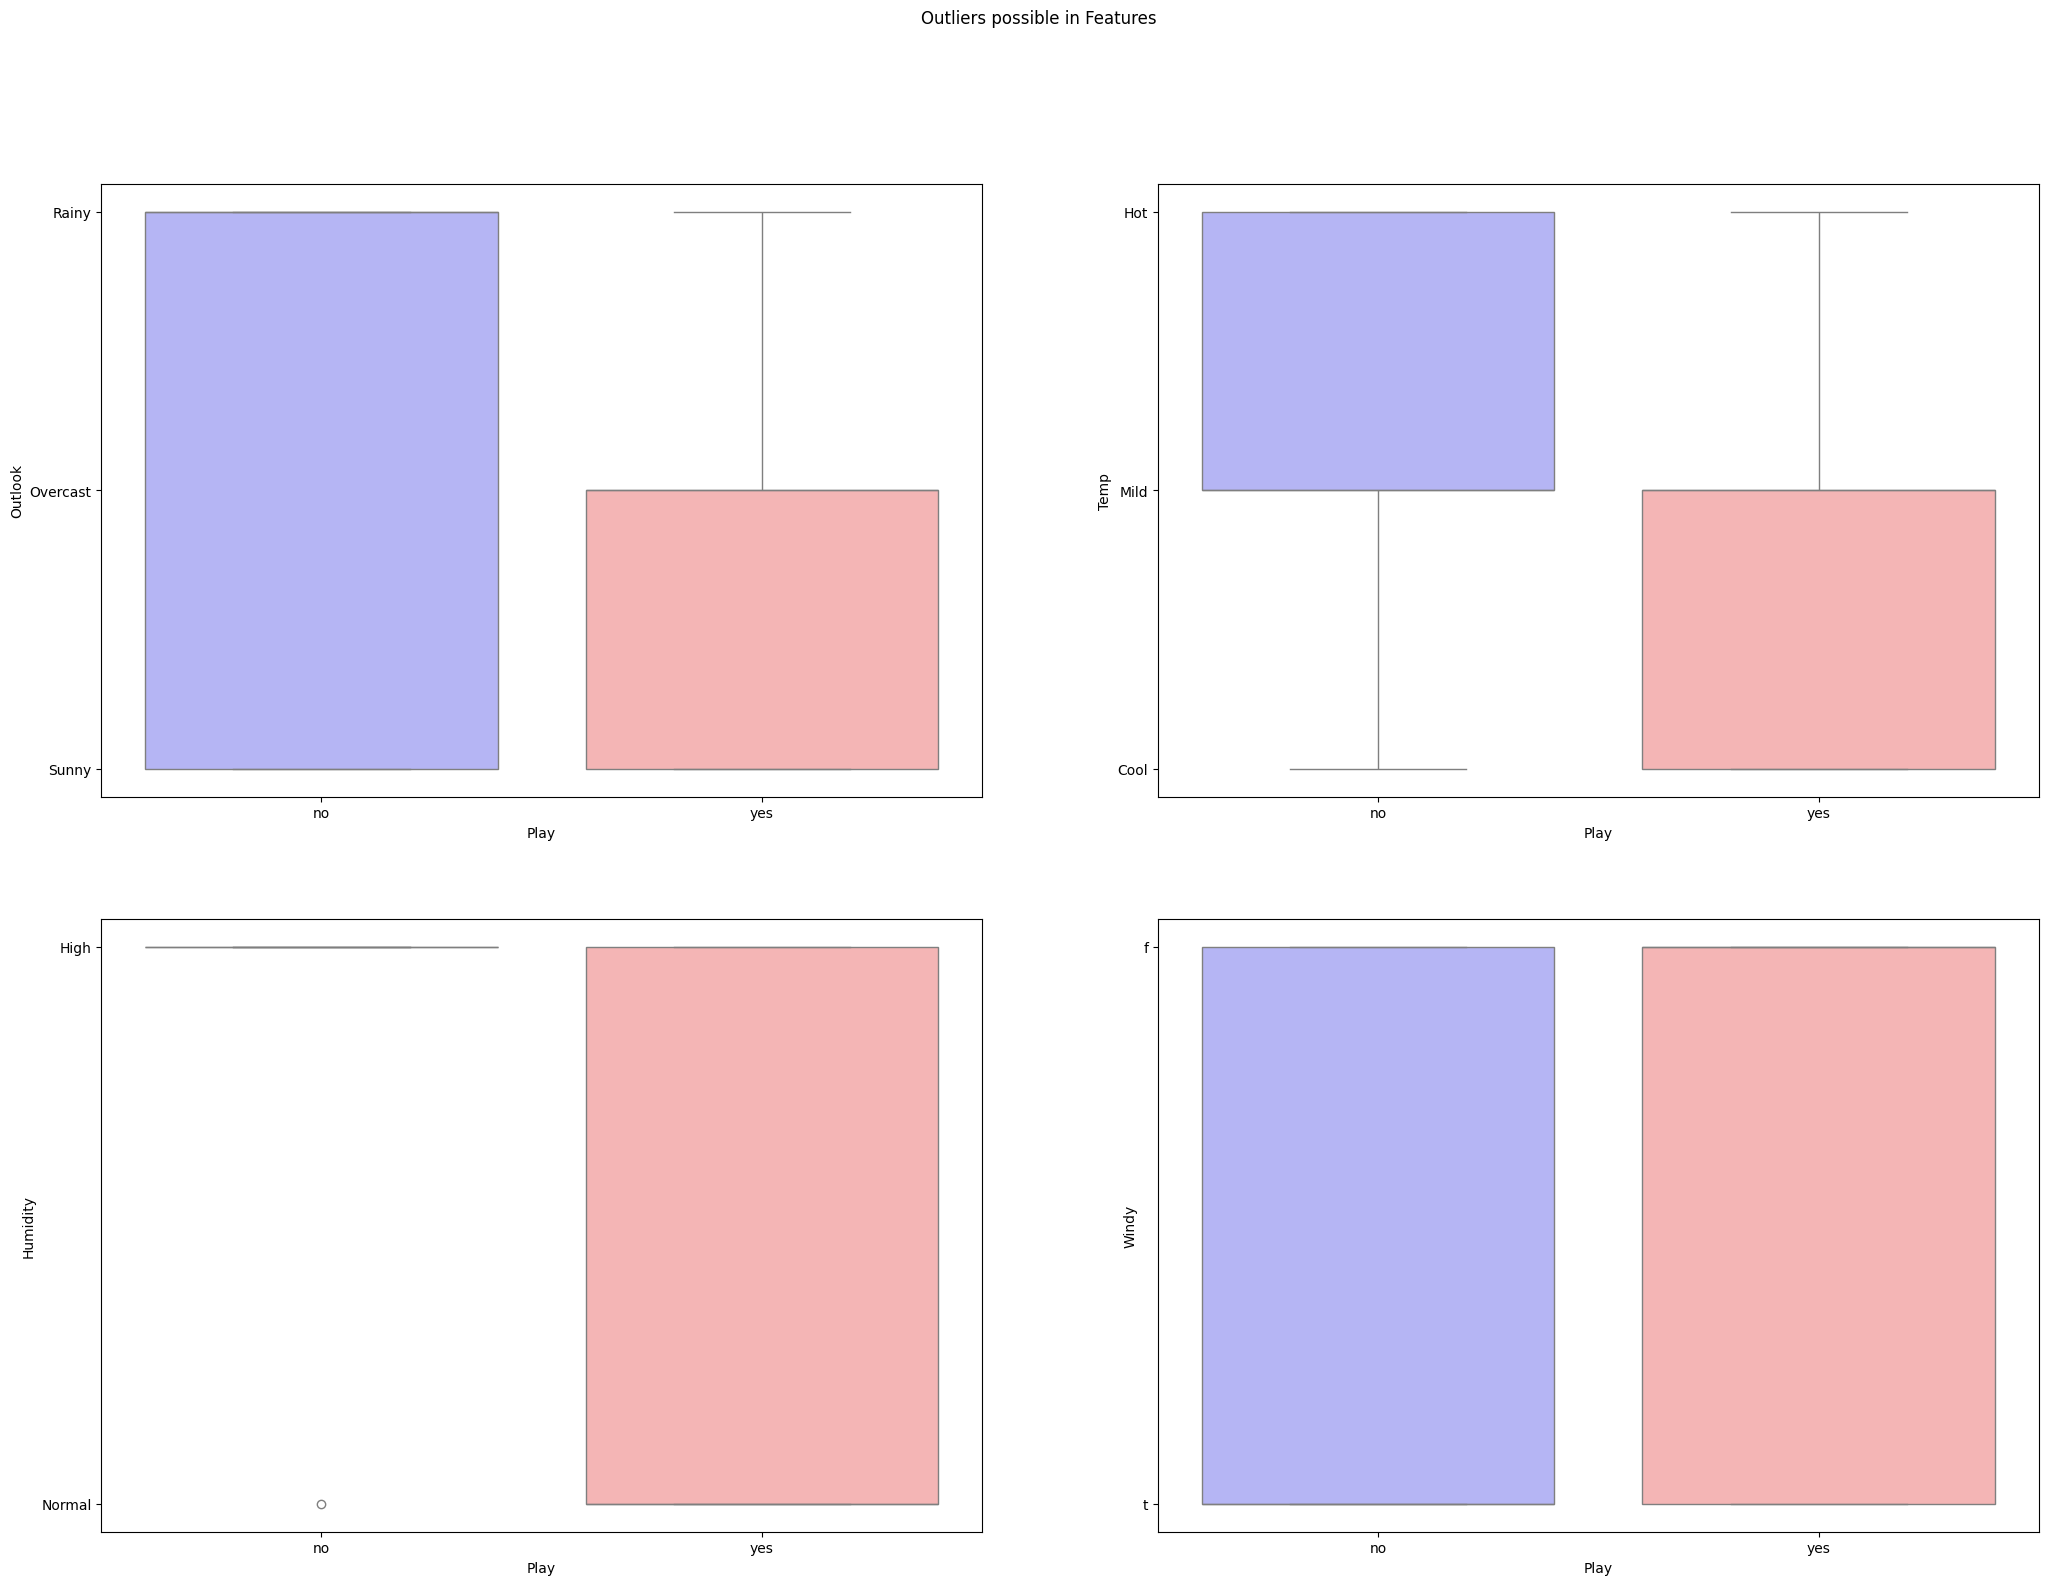

In [ ]:
figure, axes = plt.subplots(2, 2, figsize=(25, 17.5))
figure.suptitle("Outliers possible in Features")

sns.boxplot(ax=axes[0, 0], data=nb, x="Play", y="Outlook", palette="bwr")
sns.boxplot(ax=axes[0, 1], data=nb, x="Play", y="Temp", palette="bwr")
sns.boxplot(ax=axes[1, 0], data=nb, x="Play", y="Humidity", palette="bwr")
sns.boxplot(ax=axes[1, 1], data=nb, x="Play", y="Windy", palette="bwr")

In [ ]:
print(nb.info
      )

<bound method DataFrame.info of      Outlook  Temp Humidity Windy Play
0      Rainy   Hot     High     f   no
1      Rainy   Hot     High     t   no
2   Overcast   Hot     High     f  yes
3      Sunny  Mild     High     f  yes
4      Sunny  Cool   Normal     f  yes
5      Sunny  Cool   Normal     t   no
6   Overcast  Cool   Normal     t  yes
7      Rainy  Mild     High     f   no
8      Rainy  Cool   Normal     f  yes
9      Sunny  Mild   Normal     f  yes
10     Rainy  Mild   Normal     t  yes
11  Overcast  Mild     High     t  yes
12  Overcast   Hot   Normal     f  yes
13     Sunny  Mild     High     t   no>


In [5]:
X_before= nb.drop('Play', axis=1)
y_before = nb['Play']
nb

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [6]:
from sklearn.preprocessing import LabelEncoder
nb1= nb
labelencoder = LabelEncoder()

nb1['Play'] = labelencoder.fit_transform(nb['Play'])

nb1['Windy'] = labelencoder.fit_transform(nb['Windy'])
nb1['Humidity'] = labelencoder.fit_transform(nb['Humidity'])
nb1['Temp'] = labelencoder.fit_transform(nb['Temp'])
nb1['Outlook'] = labelencoder.fit_transform(nb['Outlook'])
nb1

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [7]:
X = nb1.drop('Play', axis=1)
y = nb1['Play']
nb1

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


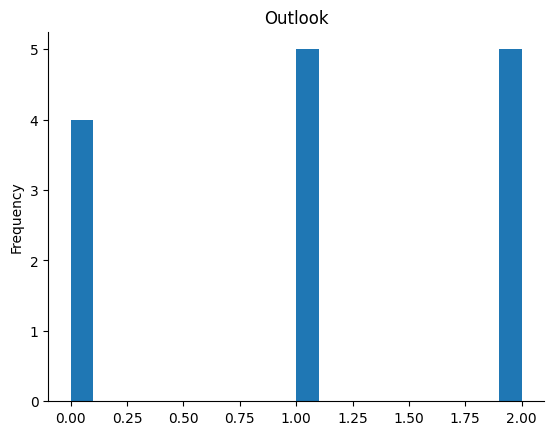

In [8]:
# @title Outlook

from matplotlib import pyplot as plt
nb['Outlook'].plot(kind='hist', bins=20, title='Outlook')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1)

In [7]:
print(X_train)
print(y_train)

    Outlook  Temp  Humidity  Windy
6         0     0         1      1
2         0     1         0      0
10        1     2         1      1
4         2     0         1      0
1         1     1         0      1
12        0     1         1      0
0         1     1         0      0
13        2     2         0      1
9         2     2         1      0
8         1     0         1      0
11        0     2         0      1
5         2     0         1      1
6     1
2     1
10    1
4     1
1     0
12    1
0     0
13    0
9     1
8     1
11    1
5     0
Name: Play, dtype: int64


## Task-1 (5 pts):
Calculate Prior Probabilities, i.e. the probability of playing
(P(Play=yes)) and not playing (P(Play=no)).

In [8]:
traindf = pd.DataFrame(X_train) #converting train set to a dataframe
traindf

,Outlook,Temp,Humidity,Windy
6,0,0,1,1
2,0,1,0,0
10,1,2,1,1
4,2,0,1,0
1,1,1,0,1
12,0,1,1,0
0,1,1,0,0
13,2,2,0,1
9,2,2,1,0
8,1,0,1,0


In [9]:
y_train_df = pd.DataFrame(y_train, columns=['Play'])

In [10]:
traindf = pd.concat([traindf, y_train_df], axis=1)


In [11]:
traindf

,Outlook,Temp,Humidity,Windy,Play
6,0,0,1,1,1
2,0,1,0,0,1
10,1,2,1,1,1
4,2,0,1,0,1
1,1,1,0,1,0
12,0,1,1,0,1
0,1,1,0,0,0
13,2,2,0,1,0
9,2,2,1,0,1
8,1,0,1,0,1


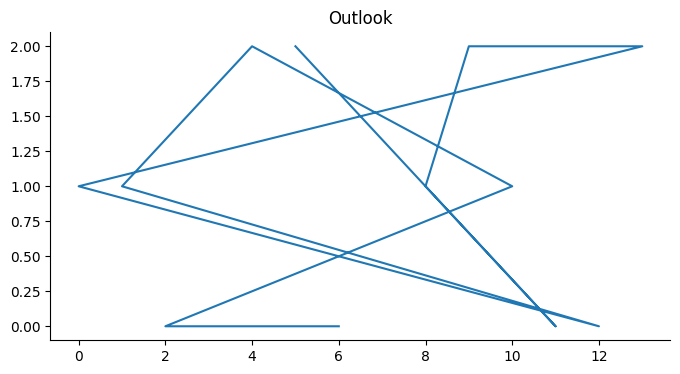

In [ ]:
# @title Outlook

from matplotlib import pyplot as plt
traindf['Outlook'].plot(kind='line', figsize=(8, 4), title='Outlook')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
testdf = pd.DataFrame(X_test)
testdf
y_test_df = pd.DataFrame(y_test, columns=['Play'])
testdf = pd.concat([testdf, y_test_df], axis=1)
testdf

,Outlook,Temp,Humidity,Windy,Play
3,2,2,0,0,1
7,1,2,0,0,0


In [13]:
traindf['Play'].value_counts()

1    8
0    4
Name: Play, dtype: int64

In [14]:
Pyes= 8/12
Pno= 4/12

In [15]:
print("P(Play=Yes): ",Pyes)
print("P(Play=No): ",Pno)


P(Play=Yes):  0.6666666666666666
P(Play=No):  0.3333333333333333


##Task-2 (10 pts):
Calculate Likelihood Probabilities: i.e. the likelihood
probabilities for each feature given the class (Play = yes or Play = no). For
example, calculate P(Outlook = Sunny|Play = yes), P(Temperature =
Mild|Play = yes), and so on.

### Label encoder encodes in alphabetical order. Hence for
### Outlook: 0=Overcast, 1= Rainy, 2= Sunny.
### For Temp: 0=Cool, 1=Hot, 2=Mild.
### For Humidity: 0=High, 1=Normal.
### For Windy: 0=f, 1=t.
### For Play: 0=no, 1=yes

In [16]:
pd.crosstab(traindf['Outlook'],traindf['Play'])

Play,0,1
Outlook,,
0,0,4
1,2,2
2,2,2


In [18]:
POverCast_yes= 4/8
PRainy_yes= 2/8
PSunny_yes= 2/8

POverCast_no= 0 #might be a problem
PRainy_no= 2/4
PSunny_no= 2/4
print("P(Outlook=Overcast | Play=yes) : ", POverCast_yes)
print("P(Outlook=Rainy | Play=yes) : ", PRainy_yes)
print("P(Outlook=Sunny | Play=yes) : ", PSunny_yes)

print("P(Outlook=Overcast | Play=no): ", POverCast_no)
print("P(Outlook=Rainy | Play=no) : ", PRainy_no)
print("P(Outlook=Sunny | Play=no) : ", PSunny_no)
#manually calculating all probabilities from the crosstab

P(Outlook=Overcast | Play=yes) :  0.5
P(Outlook=Rainy | Play=yes) :  0.25
P(Outlook=Sunny | Play=yes) :  0.25
P(Outlook=Overcast | Play=no):  0
P(Outlook=Rainy | Play=no) :  0.5
P(Outlook=Sunny | Play=no) :  0.5


In [18]:
pd.crosstab(traindf['Temp'],traindf['Play'])

Play,0,1
Temp,,
0,1,3
1,2,2
2,1,3


In [19]:
PCool_yes=3/8
PHot_yes= 2/8
PMild_yes= 3/8

PCool_no=1/4
PHot_no=2/4
PMild_no=1/4

print("P(Temp= Cool | Play=yes) : ", PCool_yes)
print("P(Temp= Hot | Play=yes) : ", PHot_yes)
print("P(Temp= Mild | Play=yes) : ", PMild_yes)

print("P(Temp= Cool | Play=no) : ", PCool_no)
print("P(Temp= Hot | Play=no) : ", PHot_no)
print("P(Temp= Mild | Play=no) : ", PMild_no)

P(Temp= Cool | Play=yes) :  0.375
P(Temp= Hot | Play=yes) :  0.25
P(Temp= Mild | Play=yes) :  0.375
P(Temp= Cool | Play=no) :  0.25
P(Temp= Hot | Play=no) :  0.5
P(Temp= Mild | Play=no) :  0.25


In [ ]:
pd.crosstab(traindf['Humidity'],traindf['Play'])

Play,0,1
Humidity,,
0,3,2
1,1,6


In [20]:
PHigh_yes=2/8
PNormal_yes= 6/8


PHigh_no=3/4
PNormal_no=1/4

print("P(Humidity= High | Play=yes) : ", PHigh_yes)
print("P(Humidity= Normal | Play=yes) : ", PNormal_yes)

print("P(Humidity= High | Play=no) : ", PHigh_no)
print("P(Humidity= Normal | Play=no) : ", PNormal_no)

P(Humidity= High | Play=yes) :  0.25
P(Humidity= Normal | Play=yes) :  0.75
P(Humidity= High | Play=no) :  0.75
P(Humidity= Normal | Play=no) :  0.25


In [ ]:
pd.crosstab(traindf['Windy'],traindf['Play'])

Play,0,1
Windy,,
0,1,5
1,3,3


In [21]:
Pf_yes=5/8
Pt_yes= 3/8


Pf_no=1/4
Pt_no=3/4

print("P(Windy= f | Play=yes) : ", Pf_yes)
print("P(Windy= t | Play=yes) : ", Pt_yes)

print("P(Windy= f | Play=no) : ", Pf_no)
print("P(Windy= t| Play=no) : ", Pt_no)

P(Windy= f | Play=yes) :  0.625
P(Windy= t | Play=yes) :  0.375
P(Windy= f | Play=no) :  0.25
P(Windy= t| Play=no) :  0.75


## Task-3 (10 pts):
Calculate Posterior Probabilities: Using the Naive Bayes
formula, calculate the posterior probabilities for both classes (Play = yes
and Play = no) for the testing split.

In [22]:
testdf

,Outlook,Temp,Humidity,Windy,Play
3,2,2,0,0,1
7,1,2,0,0,0


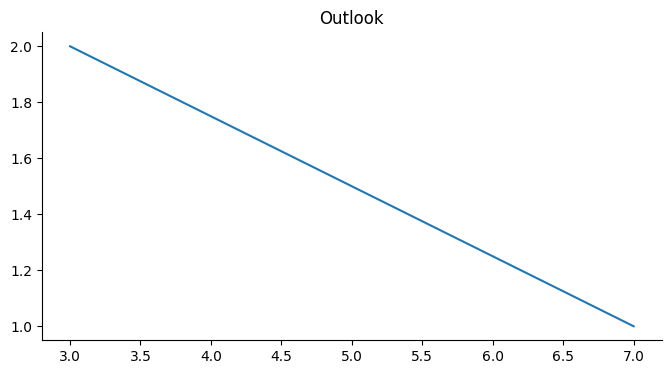

In [20]:
# @title Outlook

from matplotlib import pyplot as plt
testdf['Outlook'].plot(kind='line', figsize=(8, 4), title='Outlook')
plt.gca().spines[['top', 'right']].set_visible(False)

### Test Case 1: We see that Outlook=Sunny, Temp= Mild, Humidity=High, Windy=false
P(yes/sunny, mild, high, false)=P(sunny/yes)P(mild/yes)P(high/yes)P(false/yes)P(yes)/PX

P(no/sunny, mild, high, false) = P(sunny/no)P(mild/no)P(high/no)P(false/no)P(no)/PX

In [23]:
PX= (4/12)*(4/12)*(5/12)*(6/12)
print("P(features): ",PX)
Pyes1= (PSunny_yes*PMild_yes*PHigh_yes*Pf_yes*Pyes)/PX
Pno1= (PSunny_no*PMild_no*PHigh_no*Pf_no*Pno)/PX

print("P(yes/features for testcase 1): ", Pyes1)
print("P(no/features for testcase 1): ", Pno1)

P(features):  0.023148148148148147
P(yes/features for testcase 1):  0.421875
P(no/features for testcase 1):  0.3375


### Test Case 2: We see that Outlook=Rainy, Temp= Mild, Humidity=High, Windy=false
P(yes/rainy, mild, high, false)=P(rainy/yes)P(mild/yes)P(high/yes)P(false/yes)P(yes)/PY

P(no/rainy, mild, high, false) = P(rainy/no)P(mild/no)P(high/no)P(false/no)P(no)/PY

In [24]:
PY=(4/12)*(4/12)*(5/12)*(6/12)
Pyes2= (PRainy_yes*PMild_yes*PHigh_yes*Pf_yes*Pyes)/PY
Pno2= (PRainy_no*PMild_no*PHigh_no*Pf_no*Pno)/PY
print("P(yes/features for testcase 2): ", Pyes2)
print("P(no/features for testcase 2): ", Pno2)


P(yes/features for testcase 2):  0.421875
P(no/features for testcase 2):  0.3375


## Task-4 (5 pts):
Make Predictions: Based on the posterior probabilities,
predict whether the given test split examples will result in playing the sport
or not.

### For testcase 1
since P(yes/features):  0.421875

P(no/features):  0.3375

higher is P(yes/features) hence we assign sample 3 as Play=yes

Playtestcase1= 1

This is the correct label.

In [25]:
if Pyes1>Pno1:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=yes predicted


### For testcase 2
P(yes/features for testcase 2):  0.421875

P(no/features for testcase 2):  0.3375

Since P(yes/features) is greater, we assign sample 7 as Play= yes.

Playtestcase2 = 1.

This is the wrong label.

In [26]:
if Pyes2>Pno2:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=yes predicted


## Using another train-test split

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.13, random_state=42)
traindf2 = pd.DataFrame(X_train2)
traindf2


,Outlook,Temp,Humidity,Windy
0,1,1,0,0
12,0,1,1,0
5,2,0,1,1
8,1,0,1,0
2,0,1,0,0
1,1,1,0,1
13,2,2,0,1
4,2,0,1,0
7,1,2,0,0
10,1,2,1,1


In [28]:
y_train_df2 = pd.DataFrame(y_train2, columns=['Play'])
traindf2 = pd.concat([traindf2, y_train_df2], axis=1)
testdf2 = pd.DataFrame(X_test2)
testdf2


,Outlook,Temp,Humidity,Windy
9,2,2,1,0
11,0,2,0,1


In [29]:
y_test_df2 = pd.DataFrame(y_test2, columns=['Play'])
testdf2 = pd.concat([testdf2, y_test_df2], axis=1)
testdf2


,Outlook,Temp,Humidity,Windy,Play
9,2,2,1,0,1
11,0,2,0,1,1


In [30]:
traindf2

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
12,0,1,1,0,1
5,2,0,1,1,0
8,1,0,1,0,1
2,0,1,0,0,1
1,1,1,0,1,0
13,2,2,0,1,0
4,2,0,1,0,1
7,1,2,0,0,0
10,1,2,1,1,1


In [31]:
traindf2['Play'].value_counts()

1    7
0    5
Name: Play, dtype: int64

In [32]:
Pyesf=7/12
Pnof=5/12

In [33]:
(pd.crosstab(traindf2['Outlook'],traindf2['Play']))



Play,0,1
Outlook,,
0,0,3
1,3,2
2,2,2


In [34]:
POverCast_yes2= 3/7
PRainy_yes2= 2/7
PSunny_yes2= 2/7


POverCast_no2= 0
PRainy_no2= 3/5
PSunny_no2= 2/5
print("P(Outlook=Overcast | Play=yes) : ", POverCast_yes2)
print("P(Outlook=Rainy | Play=yes) : ", PRainy_yes2)
print("P(Outlook=Sunny | Play=yes) : ", PSunny_yes2)


print("P(Outlook=Overcast | Play=no): ", POverCast_no2)
print("P(Outlook=Rainy | Play=no) : ", PRainy_no2)
print("P(Outlook=Sunny | Play=no) : ", PSunny_no2)
#manually calculating all probabilities from the crosstab


P(Outlook=Overcast | Play=yes) :  0.42857142857142855
P(Outlook=Rainy | Play=yes) :  0.2857142857142857
P(Outlook=Sunny | Play=yes) :  0.2857142857142857
P(Outlook=Overcast | Play=no):  0
P(Outlook=Rainy | Play=no) :  0.6
P(Outlook=Sunny | Play=no) :  0.4


In [93]:
pd.crosstab(traindf2['Temp'],traindf2['Play'])


Play,0,1
Temp,,
0,1,3
1,2,2
2,2,2


In [35]:
PCool_yes2=3/7
PHot_yes2= 2/7
PMild_yes2= 2/7


PCool_no2=1/5
PHot_no2=2/5
PMild_no2=2/5


print("P(Temp= Cool | Play=yes) : ", PCool_yes2)
print("P(Temp= Hot | Play=yes) : ", PHot_yes2)
print("P(Temp= Mild | Play=yes) : ", PMild_yes2)


print("P(Temp= Cool | Play=no) : ", PCool_no2)
print("P(Temp= Hot | Play=no) : ", PHot_no2)
print("P(Temp= Mild | Play=no) : ", PMild_no2)



P(Temp= Cool | Play=yes) :  0.42857142857142855
P(Temp= Hot | Play=yes) :  0.2857142857142857
P(Temp= Mild | Play=yes) :  0.2857142857142857
P(Temp= Cool | Play=no) :  0.2
P(Temp= Hot | Play=no) :  0.4
P(Temp= Mild | Play=no) :  0.4


In [95]:
pd.crosstab(traindf2['Humidity'],traindf2['Play'])

Play,0,1
Humidity,,
0,4,2
1,1,5


In [36]:
PHigh_yes2=2/7
PNormal_yes2= 5/7
PHigh_no2=4/5
PNormal_no2=1/5
print("P(Humidity= High | Play=yes) : ", PHigh_yes2)
print("P(Humidity= Normal | Play=yes) : ", PNormal_yes2)
print("P(Humidity= High | Play=no) : ", PHigh_no2)
print("P(Humidity= Normal | Play=no) : ", PNormal_no2)




P(Humidity= High | Play=yes) :  0.2857142857142857
P(Humidity= Normal | Play=yes) :  0.7142857142857143
P(Humidity= High | Play=no) :  0.8
P(Humidity= Normal | Play=no) :  0.2


In [99]:
pd.crosstab(traindf2['Windy'],traindf2['Play'])

Play,0,1
Windy,,
0,2,5
1,3,2


In [37]:
Pf_yes2=5/7
Pt_yes2= 2/7
Pf_no2=2/5
Pt_no2=3/5

print("P(Windy= f | Play=yes) : ", Pf_yes2)
print("P(Windy= t | Play=yes) : ", Pt_yes2)


print("P(Windy= f | Play=no) : ", Pf_no2)
print("P(Windy= t| Play=no) : ", Pt_no2)

P(Windy= f | Play=yes) :  0.7142857142857143
P(Windy= t | Play=yes) :  0.2857142857142857
P(Windy= f | Play=no) :  0.4
P(Windy= t| Play=no) :  0.6


In [38]:
testdf2

,Outlook,Temp,Humidity,Windy,Play
9,2,2,1,0,1
11,0,2,0,1,1


Test Case 1: We see that Outlook=Sunny, Temp= Mild, Humidity=Normal, Windy=false

P(yes/sunny, mild, normal, false)=P(sunny/yes)P(mild/yes)P(normal/yes)P(false/yes)P(yes)/PX

P(no/sunny, mild, normal, false) = P(sunny/no)P(mild/no)P(normal/no)P(false/no)P(no)/PX

In [39]:
PX2= (4/12)*(4/12)*(6/12)*(7/12)
print("P(features): ",PX2)
Pyesnew1= (PSunny_yes2*PMild_yes2*PNormal_yes2*Pf_yes2*Pyesf)/PX2
Pnonew1= (PSunny_no2*PMild_no2*PNormal_no2*Pf_no2*Pnof)/PX2

print("P(yes/features for testcase 1): ", Pyesnew1)
print("P(no/features for testcase 1): ", Pnonew1)

P(features):  0.032407407407407406
P(yes/features for testcase 1):  0.7496876301541026
P(no/features for testcase 1):  0.16457142857142862


In [40]:
if Pyesnew1>Pnonew1:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=yes predicted


Test Case 2: We see that Outlook=Overcast, Temp= Mild, Humidity=High, Windy=true

P(yes/overcast, mild, high, true)=P(overcast/yes)P(mild/yes)P(high/yes)P(true/yes)P(yes)/PY2

P(no/overcast, mild, high, true) = P(overcast/no)P(mild/no)P(high/no)P(true/no)P(no)/PY2

In [41]:
PY2= (3/12)*(4/12)*(6/12)*(5/12)
print("P(features): ",PY2)
Pyesnew2= (POverCast_yes2*PMild_yes2*PHigh_yes2*Pt_yes2*Pyesf)/PY2
Pnonew2= (POverCast_no2*PMild_no2*PHigh_no2*Pt_no2*Pnof)/PY2

print("P(yes/features for testcase 2): ", Pyesnew2)
print("P(no/features for testcase 2): ", Pnonew2) #issue here!

P(features):  0.017361111111111112
P(yes/features for testcase 2):  0.3358600583090378
P(no/features for testcase 2):  0.0


In [42]:
if Pyesnew2>Pnonew2:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=yes predicted


### Predictions

Test case 1: Play=yes. Correct prediction.

Test case 2: Play= yes. Correct prediction.

## Task-5 (10 pts):
Use Laplace Smoothing: Laplace smoothing is an essential
technique in probabilistic models like Naive Bayes. It mitigates the challenge
of zero probabilities for unseen events by introducing a small pseudocount.
This adjustment ensures a more reliable and adaptable model, particularly

when encountering unobserved combinations of feature values during classi-
fication.

Reference: https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece
Incorporating Laplace Smoothing, recalculate the Likelihood and Posterior
Probabilities and make predictions on the test split. Report the observed
differences in your predictions justify the results in the report.

In [43]:
Pyeslp=(7+1000)/(12+2000) #using lambda= 1000
Pnolp=1- Pyeslp

In [44]:
pd.crosstab(traindf2['Outlook'],traindf2['Play'])

Play,0,1
Outlook,,
0,0,3
1,3,2
2,2,2


In [45]:
#taking k=100
#P(Overcast |no)= (No. of outlook=overcast|Play=no)+100)/No. of (no)+100*300, use similarly everywhere
POverCast_yeslp= (3+1000)/(7+ 3000)
PRainy_yeslp= (2+1000)/(7 +3000)
PSunny_yeslp= (2+1000)/(7+3000)

POverCast_nolp= (0+1000)/(5+3000) #this is usually the place where an error could have occured. We remove that using laplace smoothing
PRainy_nolp= (3+1000)/(5+3000)
PSunny_nolp= (2+1000)/(5+3000)
print("P(Outlook=Overcast | Play=yes) after laplace smoothing: ", POverCast_yeslp)
print("P(Outlook=Rainy | Play=yes) after laplace smoothing: ", PRainy_yeslp)
print("P(Outlook=Sunny | Play=yes) after laplace smoothing: ", PSunny_yeslp)

print("P(Outlook=Overcast | Play=no) after laplace smoothing: ", POverCast_nolp)
print("P(Outlook=Rainy | Play=no) after laplace smoothing: ", PRainy_nolp)
print("P(Outlook=Sunny | Play=no) after laplace smoothing: ", PSunny_nolp)
#manually calculating all probabilities from the crosstab


P(Outlook=Overcast | Play=yes) after laplace smoothing:  0.3335550382440971
P(Outlook=Rainy | Play=yes) after laplace smoothing:  0.3332224808779514
P(Outlook=Sunny | Play=yes) after laplace smoothing:  0.3332224808779514
P(Outlook=Overcast | Play=no) after laplace smoothing:  0.33277870216306155
P(Outlook=Rainy | Play=no) after laplace smoothing:  0.33377703826955074
P(Outlook=Sunny | Play=no) after laplace smoothing:  0.3334442595673877


In [121]:
pd.crosstab(traindf2['Temp'],traindf2['Play'])

Play,0,1
Temp,,
0,1,3
1,2,2
2,2,2


In [46]:
PCool_yeslp=(3+1000)/(7+3000)
PHot_yeslp= (2+1000)/(7+3000)
PMild_yeslp= (2+1000)/(7+3000)

PCool_nolp=(1+1000)/(5+3000)
PHot_nolp=(2+1000)/(5+3000)
PMild_nolp=(2+1000)/(5+3000)

print("P(Temp= Cool | Play=yes) : ", PCool_yeslp)
print("P(Temp= Hot | Play=yes) : ", PHot_yeslp)
print("P(Temp= Mild | Play=yes) : ", PMild_yeslp)

print("P(Temp= Cool | Play=no) : ", PCool_nolp)
print("P(Temp= Hot | Play=no) : ", PHot_nolp)
print("P(Temp= Mild | Play=no) : ", PMild_nolp)

P(Temp= Cool | Play=yes) :  0.3335550382440971
P(Temp= Hot | Play=yes) :  0.3332224808779514
P(Temp= Mild | Play=yes) :  0.3332224808779514
P(Temp= Cool | Play=no) :  0.33311148086522463
P(Temp= Hot | Play=no) :  0.3334442595673877
P(Temp= Mild | Play=no) :  0.3334442595673877


In [123]:
pd.crosstab(traindf2['Humidity'],traindf2['Play'])

Play,0,1
Humidity,,
0,4,2
1,1,5


In [47]:
PHigh_yeslp=(2+1000)/(7+2000)
PNormal_yeslp= (5+1000)/(7+2000)


PHigh_nolp=(4+1000)/(5+2000)
PNormal_nolp=(1+1000)/(5+2000)

print("P(Humidity= High | Play=yes) : ", PHigh_yeslp)
print("P(Humidity= Normal | Play=yes) : ", PNormal_yeslp)

print("P(Humidity= High | Play=no) : ", PHigh_nolp)
print("P(Humidity= Normal | Play=no) : ", PNormal_nolp)

P(Humidity= High | Play=yes) :  0.4992526158445441
P(Humidity= Normal | Play=yes) :  0.5007473841554559
P(Humidity= High | Play=no) :  0.5007481296758105
P(Humidity= Normal | Play=no) :  0.49925187032418955


In [125]:
pd.crosstab(traindf2['Windy'],traindf2['Play'])

Play,0,1
Windy,,
0,2,5
1,3,2


In [48]:
Pf_yeslp=(5+1000)/(7+2000)
Pt_yeslp= (2+1000)/(7+2000)


Pf_nolp= (2+1000)/(5+2000)
Pt_nolp=(3+1000)/(5+2000)

print("P(Windy= f | Play=yes) : ", Pf_yeslp)
print("P(Windy= t | Play=yes) : ", Pt_yeslp)

print("P(Windy= f | Play=no) : ", Pf_nolp)
print("P(Windy= t| Play=no) : ", Pt_nolp)

P(Windy= f | Play=yes) :  0.5007473841554559
P(Windy= t | Play=yes) :  0.4992526158445441
P(Windy= f | Play=no) :  0.49975062344139654
P(Windy= t| Play=no) :  0.5002493765586035


In [49]:
testdf2

,Outlook,Temp,Humidity,Windy,Play
9,2,2,1,0,1
11,0,2,0,1,1


### For test case 1

In [50]:
PXe= (4/12)*(4/12)*(6/12)*(7/12)
print("P(features): ",PXe)
Pyes1lp= (PSunny_yeslp*PMild_yeslp*PNormal_yeslp*Pf_yeslp*Pyeslp)/PXe
Pno1lp= (PSunny_nolp*PMild_nolp*PNormal_nolp*Pf_nolp*Pnolp)/PXe

print("P(yes/features for testcase 1): ", Pyes1lp)
print("P(no/features for testcase 1): ", Pno1lp)

P(features):  0.032407407407407406
P(yes/features for testcase 1):  0.42999476741711434
P(no/features for testcase 1):  0.42757601169858006


In [52]:
if Pyes1lp>Pno1lp:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=yes predicted


Correct Prediction

### For test case 2

In [51]:
PYe=(3/12)*(4/12)*(6/12)*(5/12)
Pyes2lp= (POverCast_yeslp*PMild_yeslp*PHigh_yeslp*Pt_yeslp*Pyeslp)/PYe
Pno2lp= (POverCast_nolp*PMild_nolp*PHigh_nolp*Pt_nolp*Pnolp)/PYe
print("P(yes/features for testcase 2): ", Pyes2lp)
print("P(no/features for testcase 2): ", Pno2lp)

P(yes/features for testcase 2):  0.798668349413036
P(no/features for testcase 2):  0.7997333914031256


In [53]:
if Pyes2lp>Pno2lp:
  print("Play=yes predicted")
else:
  print("Play=no predicted")

Play=no predicted


Wrong prediction

## Correlation matrix to see dependencies

In [54]:

#from scipy.stats import chi2_contingency
corr_matrix = nb1.drop(columns='Play').corr()
print(corr_matrix)

           Outlook      Temp      Humidity         Windy
Outlook   1.000000  0.092036  8.944272e-02 -7.745967e-02
Temp      0.092036  1.000000 -5.144958e-01  2.475369e-02
Humidity  0.089443 -0.514496  1.000000e+00  1.602469e-17
Windy    -0.077460  0.024754  1.602469e-17  1.000000e+00
